*#BIBLIOTECAS  *



*   yfinance :https://pypi.org/project/yfinance/
*   investpy :https://investpy.readthedocs.io/
*   pybovespa : https://pypi.org/project/pybovespa/
*   quandl :https://data.nasdaq.com/ #site mudou o nome 
*   pandasfinance : https://pypi.org/project/pandas-finance/
*   pandasreader : https://pandas-datareader.readthedocs.io/en/latest/










In [ ]:
import pandas as period


In [ ]:
 pip install plotly==5.10.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#bibliotecas

import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as period
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas_datareader import data as web


In [ ]:
import statsmodels.tsa.seasonal as dc

## 1) Aquisição de dados de ações 

In [ ]:
ticket = yf.Ticker("ITSA4.SA") #aqui é a ação , estou atribuindo o valor de ticket
#df= data definido
#df = ticket.history(period = 2y', interval = '1mo' ) # difinição de dados
df= ticket.history(interval='1d',start= '2020-01-01', end = '2022-10-14')

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-03:00,11.933980,12.136538,11.874901,12.111217,19199040.0,0.0,0.0
2020-01-03 00:00:00-03:00,11.984621,12.119659,11.917103,11.933982,22913100.0,0.0,0.0
2020-01-06 00:00:00-03:00,11.917098,11.993056,11.824260,11.908658,21286440.0,0.0,0.0
2020-01-07 00:00:00-03:00,11.917101,11.933980,11.663904,11.748302,21072555.0,0.0,0.0
2020-01-08 00:00:00-03:00,11.773625,11.858024,11.545748,11.571068,20354565.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-06 00:00:00-03:00,10.370000,10.400000,10.230000,10.300000,20370200.0,0.0,0.0
2022-10-07 00:00:00-03:00,10.260000,10.300000,10.070000,10.230000,14570800.0,0.0,0.0
2022-10-10 00:00:00-03:00,10.270000,10.280000,10.110000,10.210000,18152000.0,0.0,0.0


In [ ]:
df.tail(10) #VAI PEGAR AS ULTIMAS 10 INFORMAÇÕES 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-29 00:00:00-03:00,9.47,9.69,9.42,9.61,26383900.0,0.0,0.0
2022-09-30 00:00:00-03:00,9.60,9.81,9.56,9.73,29456200.0,0.0,0.0
2022-10-03 00:00:00-03:00,9.90,10.44,9.88,10.42,49866100.0,0.0,0.0
2022-10-04 00:00:00-03:00,10.50,10.61,10.26,10.32,38458300.0,0.0,0.0
2022-10-05 00:00:00-03:00,10.34,10.46,10.28,10.35,15580100.0,0.0,0.0
2022-10-06 00:00:00-03:00,10.37,10.40,10.23,10.30,20370200.0,0.0,0.0
2022-10-07 00:00:00-03:00,10.26,10.30,10.07,10.23,14570800.0,0.0,0.0
2022-10-10 00:00:00-03:00,10.27,10.28,10.11,10.21,18152000.0,0.0,0.0
2022-10-11 00:00:00-03:00,10.15,10.26,10.02,10.08,25150200.0,0.0,0.0


### 2) DECOMPOSIÇÃO DE UMA SERIE TEMPORAL 

MODELOS MATEMATICOS 
additive Model

*   additive Model
        
          *   y(t) = Trend_t + Seasonality_t + Noisr

*   multiplicate Model
        *   y(t) = Trend_t * seasonality_t* Noise_t


















In [ ]:
df[['Close']].info () #mostra o tipo de dados que tem aqui

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 693 entries, 2020-01-02 00:00:00-03:00 to 2022-10-13 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   692 non-null    float64
dtypes: float64(1)
memory usage: 27.0 KB


In [ ]:
df[['Close']].head()


,Close
Date,
2020-01-02 00:00:00-03:00,12.111217
2020-01-03 00:00:00-03:00,11.933982
2020-01-06 00:00:00-03:00,11.908658
2020-01-07 00:00:00-03:00,11.748302
2020-01-08 00:00:00-03:00,11.571068


In [ ]:
#df[df[['Close']].isnull()]

In [ ]:
decomposicao = seasonal_decompose(df[['Close']].fillna(method="ffill"),period=30, model='additive', extrapolate_trend=30 )

In [ ]:
decomposicao_multi = seasonal_decompose(df[['Close']].fillna(method="ffill"),period=30, model='multiplicative', extrapolate_trend=30 )

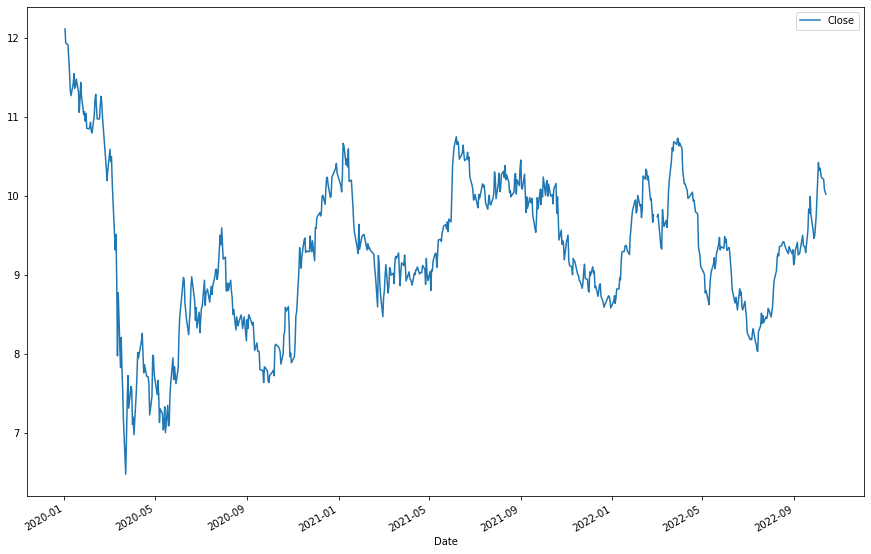

In [ ]:
df[['Close']].plot(figsize=(15,10))

In [ ]:
 decomposicao.seasonal + decomposicao.resid + decomposicao.trend 

Date
2020-01-02 00:00:00-03:00    12.111217
2020-01-03 00:00:00-03:00    11.933982
2020-01-06 00:00:00-03:00    11.908658
2020-01-07 00:00:00-03:00    11.748302
2020-01-08 00:00:00-03:00    11.571068
                               ...    
2022-10-06 00:00:00-03:00    10.300000
2022-10-07 00:00:00-03:00    10.230000
2022-10-10 00:00:00-03:00    10.210000
2022-10-11 00:00:00-03:00    10.080000
2022-10-13 00:00:00-03:00    10.020000
Length: 693, dtype: float64

In [ ]:
decomposicao.trend.iloc[0:5]

Date
2020-01-02 00:00:00-03:00    12.505797
2020-01-03 00:00:00-03:00    12.441537
2020-01-06 00:00:00-03:00    12.377277
2020-01-07 00:00:00-03:00    12.313016
2020-01-08 00:00:00-03:00    12.248756
Name: trend, dtype: float64

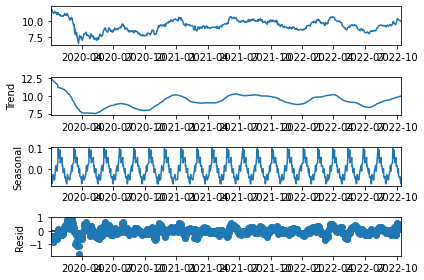

In [ ]:
decomposicao.plot() ;


In [ ]:
decomposicao.seasonal

Date
2020-01-02 00:00:00-03:00   -0.042256
2020-01-03 00:00:00-03:00   -0.037284
2020-01-06 00:00:00-03:00   -0.069955
2020-01-07 00:00:00-03:00   -0.070941
2020-01-08 00:00:00-03:00   -0.050309
                               ...   
2022-10-06 00:00:00-03:00    0.001197
2022-10-07 00:00:00-03:00   -0.033911
2022-10-10 00:00:00-03:00   -0.042256
2022-10-11 00:00:00-03:00   -0.037284
2022-10-13 00:00:00-03:00   -0.069955
Name: seasonal, Length: 693, dtype: float64

In [ ]:
decomposicao_multi.seasonal

Date
2020-01-02 00:00:00-03:00    0.995154
2020-01-03 00:00:00-03:00    0.995645
2020-01-06 00:00:00-03:00    0.991870
2020-01-07 00:00:00-03:00    0.991973
2020-01-08 00:00:00-03:00    0.994055
                               ...   
2022-10-06 00:00:00-03:00    0.998813
2022-10-07 00:00:00-03:00    0.994735
2022-10-10 00:00:00-03:00    0.995154
2022-10-11 00:00:00-03:00    0.995645
2022-10-13 00:00:00-03:00    0.991870
Name: seasonal, Length: 693, dtype: float64

In [ ]:
min(decomposicao_multi.resid)

0.7922819113327965

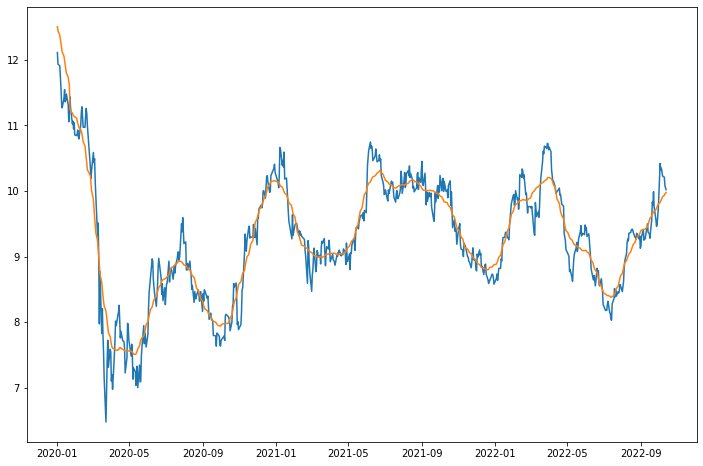

In [ ]:
ax , fig = plt.subplots (figsize =(12,8) )
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)


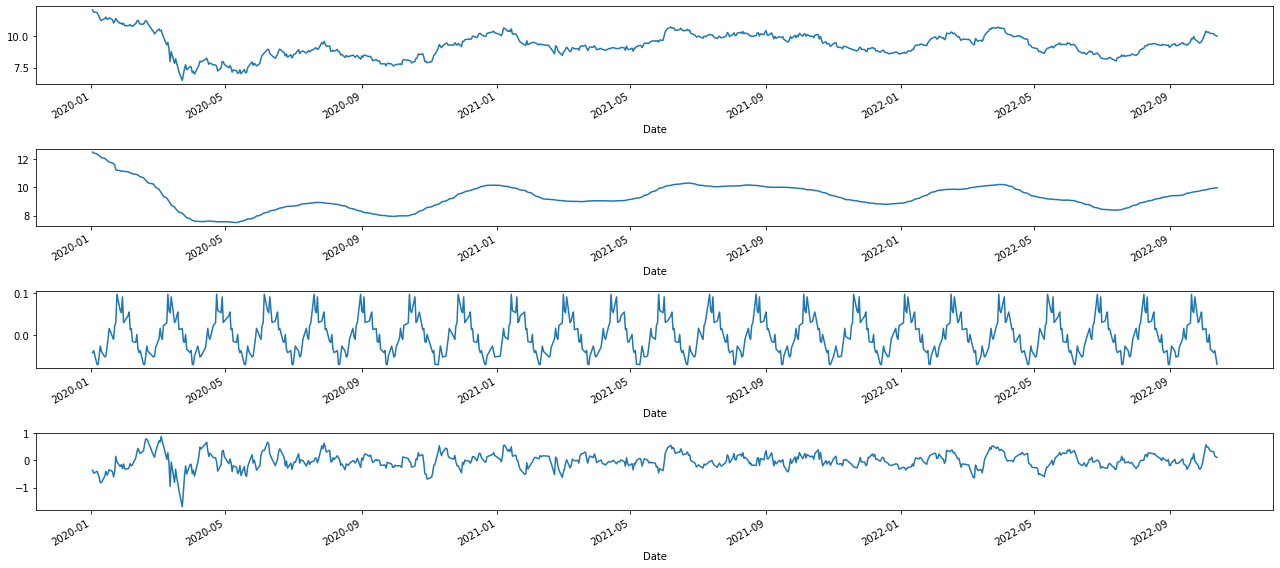

In [ ]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize= (18,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax= ax4)
plt.tight_layout()
#ajusta para nao comer informacoes do eixo x

## 3) Calculo de média movel 

In [ ]:
df['Close'].rolling(7).mean() #calcula a media movel no periodo escolhido #os primeiros ficam nulos porque precisa de 7 dias para atribuir valor

Date
2020-01-02 00:00:00-03:00          NaN
2020-01-03 00:00:00-03:00          NaN
2020-01-06 00:00:00-03:00          NaN
2020-01-07 00:00:00-03:00          NaN
2020-01-08 00:00:00-03:00          NaN
                               ...    
2022-10-06 00:00:00-03:00    10.031428
2022-10-07 00:00:00-03:00    10.137143
2022-10-10 00:00:00-03:00    10.222857
2022-10-11 00:00:00-03:00    10.272857
2022-10-13 00:00:00-03:00    10.215714
Name: Close, Length: 693, dtype: float64

In [ ]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()


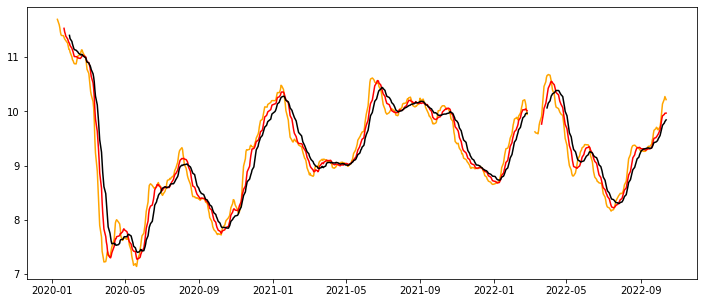

In [ ]:
fig, ax= plt.subplots(figsize= (12,5))
plt.plot(media_movel7d,'orange')
plt.plot(media_movel14d, 'red')
plt.plot(media_movel21d, 'black')


## 4) EXTRAÇÃO DE FEATURES

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-03:00,11.933980,12.136538,11.874901,12.111217,19199040.0,0.0,0.0
2020-01-03 00:00:00-03:00,11.984621,12.119659,11.917103,11.933982,22913100.0,0.0,0.0
2020-01-06 00:00:00-03:00,11.917098,11.993056,11.824260,11.908658,21286440.0,0.0,0.0
2020-01-07 00:00:00-03:00,11.917101,11.933980,11.663904,11.748302,21072555.0,0.0,0.0
2020-01-08 00:00:00-03:00,11.773625,11.858024,11.545748,11.571068,20354565.0,0.0,0.0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02 00:00:00-03:00,11.933980,12.136538,11.874901,12.111217,19199040.0,0.0,0.0
1,2020-01-03 00:00:00-03:00,11.984621,12.119659,11.917103,11.933982,22913100.0,0.0,0.0
2,2020-01-06 00:00:00-03:00,11.917098,11.993056,11.824260,11.908658,21286440.0,0.0,0.0
3,2020-01-07 00:00:00-03:00,11.917101,11.933980,11.663904,11.748302,21072555.0,0.0,0.0
4,2020-01-08 00:00:00-03:00,11.773625,11.858024,11.545748,11.571068,20354565.0,0.0,0.0


In [ ]:
df['Date'].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
688    2022
689    2022
690    2022
691    2022
692    2022
Name: Date, Length: 693, dtype: int64

In [ ]:
#agora criando as fatures para cada periodo
df['year']= df ['Date'].dt.year
df['mont']= df ['Date'].dt.month
df['day'] = df ['Date'].dt.day

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,mont,day
0,2020-01-02 00:00:00-03:00,11.933980,12.136538,11.874901,12.111217,19199040.0,0.0,0.0,2020,1,2
1,2020-01-03 00:00:00-03:00,11.984621,12.119659,11.917103,11.933982,22913100.0,0.0,0.0,2020,1,3
2,2020-01-06 00:00:00-03:00,11.917098,11.993056,11.824260,11.908658,21286440.0,0.0,0.0,2020,1,6
3,2020-01-07 00:00:00-03:00,11.917101,11.933980,11.663904,11.748302,21072555.0,0.0,0.0,2020,1,7
4,2020-01-08 00:00:00-03:00,11.773625,11.858024,11.545748,11.571068,20354565.0,0.0,0.0,2020,1,8


##4) Calculando a rentabilidade da ação 


*   Rentabilidade é o preço atual/ preço anterior *100-100




In [ ]:
df[['Close']]

,Close
0,12.111217
1,11.933982
2,11.908658
3,11.748302
4,11.571068
...,...
688,10.300000
689,10.230000
690,10.210000
691,10.080000


In [ ]:
df['Close'].head()

0    12.111217
1    11.933982
2    11.908658
3    11.748302
4    11.571068
Name: Close, dtype: float64

In [ ]:
df['Close'].shift()

0            NaN
1      12.111217
2      11.933982
3      11.908658
4      11.748302
         ...    
688    10.350000
689    10.300000
690    10.230000
691    10.210000
692    10.080000
Name: Close, Length: 693, dtype: float64

In [ ]:
df['rentabilidade']=df [ 'Close'] / df['Close'].shift()    *100  - 100 
#essa variavel permite compararmos a data de fechamento e comparar a rentabilidade

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,mont,day,rentabilidade
0,2020-01-02 00:00:00-03:00,11.933980,12.136538,11.874901,12.111217,19199040.0,0.0,0.0,2020,1,2,NaN
1,2020-01-03 00:00:00-03:00,11.984621,12.119659,11.917103,11.933982,22913100.0,0.0,0.0,2020,1,3,-1.463400
2,2020-01-06 00:00:00-03:00,11.917098,11.993056,11.824260,11.908658,21286440.0,0.0,0.0,2020,1,6,-0.212200
3,2020-01-07 00:00:00-03:00,11.917101,11.933980,11.663904,11.748302,21072555.0,0.0,0.0,2020,1,7,-1.346546
4,2020-01-08 00:00:00-03:00,11.773625,11.858024,11.545748,11.571068,20354565.0,0.0,0.0,2020,1,8,-1.508598


In [ ]:
def features_extraction (df_):
  df_['year'] = df_['Date'].dt.year
  df_['month'] = df_['Date'].dt.month
  df_['day'] = df_['Date'].dt.day
  df_['rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 - 100

In [ ]:
df.reset_index(inplace=True)


In [ ]:
features_extraction(df)

In [ ]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,mont,day,rentabilidade,month
0,0,2020-01-02 00:00:00-03:00,11.933980,12.136538,11.874901,12.111217,19199040.0,0.0,0.0,2020,1,2,NaN,1
1,1,2020-01-03 00:00:00-03:00,11.984621,12.119659,11.917103,11.933982,22913100.0,0.0,0.0,2020,1,3,-1.463400,1
2,2,2020-01-06 00:00:00-03:00,11.917098,11.993056,11.824260,11.908658,21286440.0,0.0,0.0,2020,1,6,-0.212200,1
3,3,2020-01-07 00:00:00-03:00,11.917101,11.933980,11.663904,11.748302,21072555.0,0.0,0.0,2020,1,7,-1.346546,1
4,4,2020-01-08 00:00:00-03:00,11.773625,11.858024,11.545748,11.571068,20354565.0,0.0,0.0,2020,1,8,-1.508598,1


## Hipotese
## 1)Existe um melhor mes pra investir no ativo ?


*  Cosiderando 2 anos de dados de rentabilidade, 



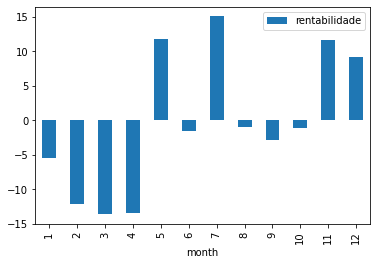

In [ ]:
df.groupby('month').agg({'rentabilidade':'sum'}).plot(kind ='bar')

In [ ]:
df.set_index('Date',inplace= True)

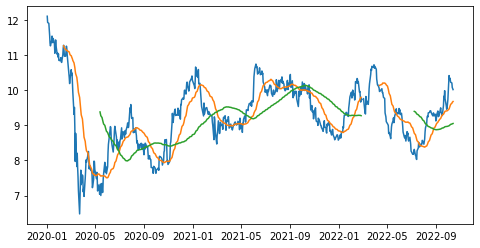

In [ ]:
media_movel30d = df['Close'].rolling(30).mean()
media_movel90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(media_movel30d)
plt.plot(media_movel90d)

## Hipotese 2) Existe um melhor dia para investir  ?

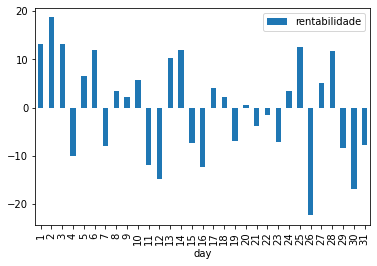

In [ ]:
df.groupby('day').agg({'rentabilidade':'sum'}).plot(kind='bar')


In [ ]:
df.iloc[0]

index            0.000000e+00
Open             1.193398e+01
High             1.213654e+01
Low              1.187490e+01
Close            1.211122e+01
Volume           1.919904e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.020000e+03
mont             1.000000e+00
day              2.000000e+00
rentabilidade             NaN
month            1.000000e+00
Name: 2020-01-02 00:00:00-03:00, dtype: float64

In [ ]:
df.iloc[-1]

index            6.920000e+02
Open             1.000000e+01
High             1.013000e+01
Low              9.940000e+00
Close            1.002000e+01
Volume           2.017920e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.022000e+03
mont             1.000000e+01
day              1.300000e+01
rentabilidade   -5.952328e-01
month            1.000000e+01
Name: 2022-10-13 00:00:00-03:00, dtype: float64

In [ ]:
df.iloc[-1]

index            6.920000e+02
Open             1.000000e+01
High             1.013000e+01
Low              9.940000e+00
Close            1.002000e+01
Volume           2.017920e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.022000e+03
mont             1.000000e+01
day              1.300000e+01
rentabilidade   -5.952328e-01
month            1.000000e+01
Name: 2022-10-13 00:00:00-03:00, dtype: float64

In [ ]:
df['Close'].iloc[-1] / df ['Close'].iloc[0] * 100 - 100

-17.266778019851444

In [ ]:
df['rentabilidade'].sum()

-3.462942618715516

## 5) Correlação de series temporais 

In [ ]:
tickets = ['VALE3.SA', 'ITUB4.SA','PETR4.SA','ABEV3.SA','BBDC4.SA', 'BBAS3.SA','^BVSP','USDBRL=X']

In [ ]:
dfs = [] #COLOCANDO TODOS OS DADOS NO DATAFRAME

for t in tickets:
  print('Reading ticker {}...'.format(t))
  ticket = yf.Ticker(t)
  aux = ticket.history(interval= '1d', start='2019-01-01', end='2022-01-01')
  aux.reset_index(inplace = True)
  aux['ticket'] = ticket
  dfs.append(aux)


Reading ticker VALE3.SA...
Reading ticker ITUB4.SA...
Reading ticker PETR4.SA...
Reading ticker ABEV3.SA...
Reading ticker BBDC4.SA...
Reading ticker BBAS3.SA...
Reading ticker ^BVSP...
Reading ticker USDBRL=X...


In [ ]:
dfs[0] #aqui posso escolher qual ticket visualizar, seguindo sua ordem na lista de (0 -/)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2019-01-02 00:00:00-02:00,36.394269,37.383995,36.234168,37.180229,17319600,0.0,0,yfinance.Ticker object <VALE3.SA>
1,2019-01-03 00:00:00-02:00,36.969183,37.071066,35.222609,35.659252,30120000,0.0,0,yfinance.Ticker object <VALE3.SA>
2,2019-01-04 00:00:00-02:00,36.256001,38.169957,36.256001,37.980743,43360100,0.0,0,yfinance.Ticker object <VALE3.SA>
3,2019-01-07 00:00:00-02:00,38.475603,39.043242,37.638704,37.776974,20998900,0.0,0,yfinance.Ticker object <VALE3.SA>
4,2019-01-08 00:00:00-02:00,37.988018,38.424661,37.565927,38.140842,19925600,0.0,0,yfinance.Ticker object <VALE3.SA>
...,...,...,...,...,...,...,...,...,...
738,2021-12-23 00:00:00-03:00,73.196268,73.296977,72.143419,72.463852,13121200,0.0,0,yfinance.Ticker object <VALE3.SA>
739,2021-12-27 00:00:00-03:00,72.207502,72.738502,71.649031,72.280739,11371400,0.0,0,yfinance.Ticker object <VALE3.SA>
740,2021-12-28 00:00:00-03:00,71.877911,71.896218,70.101789,70.541245,18923700,0.0,0,yfinance.Ticker object <VALE3.SA>
741,2021-12-29 00:00:00-03:00,69.927840,71.392687,69.900376,70.724350,12113500,0.0,0,yfinance.Ticker object <VALE3.SA>


In [ ]:
for d in dfs:  #pra cada datafrase vou extrair as featrures 
  features_extraction(d)

In [ ]:
dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,rentabilidade
0,2019-01-02 00:00:00-02:00,31.128874,32.622076,31.049822,32.499107,25581700,0.015,0,yfinance.Ticker object <ITUB4.SA>,2019,1,2,NaN
1,2019-01-03 00:00:00-02:00,32.279504,33.034889,32.015999,33.034889,21938600,0.000,0,yfinance.Ticker object <ITUB4.SA>,2019,1,3,1.648605
2,2019-01-04 00:00:00-02:00,32.692340,33.122731,32.279512,32.481533,24873500,0.000,0,yfinance.Ticker object <ITUB4.SA>,2019,1,4,-1.675066
3,2019-01-07 00:00:00-02:00,32.323422,32.938271,32.279505,32.543011,16901100,0.000,0,yfinance.Ticker object <ITUB4.SA>,2019,1,7,0.189270
4,2019-01-08 00:00:00-02:00,32.657197,32.999754,32.112618,32.955837,19556300,0.000,0,yfinance.Ticker object <ITUB4.SA>,2019,1,8,1.268557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2021-12-23 00:00:00-03:00,20.914719,21.150046,20.757834,20.924524,22377000,0.000,0,yfinance.Ticker object <ITUB4.SA>,2021,12,23,0.518136
739,2021-12-27 00:00:00-03:00,21.061795,21.277513,20.895105,21.140238,14025800,0.000,0,yfinance.Ticker object <ITUB4.SA>,2021,12,27,1.030912
740,2021-12-28 00:00:00-03:00,21.208877,21.277516,20.983356,21.061798,15294200,0.000,0,yfinance.Ticker object <ITUB4.SA>,2021,12,28,-0.371045
741,2021-12-29 00:00:00-03:00,21.110823,21.159849,20.816663,20.885300,12856100,0.000,0,yfinance.Ticker object <ITUB4.SA>,2021,12,29,-0.838003


In [ ]:
correlacao = pd.DataFrame()
for d in dfs:
  #print(d)
  correlacao[d['ticket'].iloc[0]] = d['rentabilidade']

In [ ]:
print(type(d))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
correlacao.head()

,yfinance.Ticker object <VALE3.SA>,yfinance.Ticker object <ITUB4.SA>,yfinance.Ticker object <PETR4.SA>,yfinance.Ticker object <ABEV3.SA>,yfinance.Ticker object <BBDC4.SA>,yfinance.Ticker object <BBAS3.SA>,yfinance.Ticker object <^BVSP>,yfinance.Ticker object <USDBRL=X>
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.090822,1.648605,2.452215,1.114552,1.012987,0.411537,0.606513,-0.002581
2,6.510207,-1.675066,0.283981,1.347211,-0.784651,0.000000,0.302521,-2.412434
3,-0.536508,0.189270,1.577663,-0.422960,1.186343,-0.655739,-0.154615,-0.824022
4,0.963202,1.268557,-0.597367,-2.002427,0.610663,-1.134483,0.363145,-2.500598


In [ ]:
correlacao.corr()

,yfinance.Ticker object <VALE3.SA>,yfinance.Ticker object <ITUB4.SA>,yfinance.Ticker object <PETR4.SA>,yfinance.Ticker object <ABEV3.SA>,yfinance.Ticker object <BBDC4.SA>,yfinance.Ticker object <BBAS3.SA>,yfinance.Ticker object <^BVSP>,yfinance.Ticker object <USDBRL=X>
yfinance.Ticker object <VALE3.SA>,1.000000,0.400857,0.554430,0.242341,0.426628,0.477583,0.655978,0.021624
yfinance.Ticker object <ITUB4.SA>,0.400857,1.000000,0.596792,0.523072,0.719886,0.787078,0.772314,0.012767
yfinance.Ticker object <PETR4.SA>,0.554430,0.596792,1.000000,0.453255,0.577027,0.693055,0.817568,0.038658
yfinance.Ticker object <ABEV3.SA>,0.242341,0.523072,0.453255,1.000000,0.478444,0.498212,0.616550,0.066179
yfinance.Ticker object <BBDC4.SA>,0.426628,0.719886,0.577027,0.478444,1.000000,0.754479,0.726338,0.043141
yfinance.Ticker object <BBAS3.SA>,0.477583,0.787078,0.693055,0.498212,0.754479,1.000000,0.846785,0.027288
yfinance.Ticker object <^BVSP>,0.655978,0.772314,0.817568,0.616550,0.726338,0.846785,1.000000,0.031740
yfinance.Ticker object <USDBRL=X>,0.021624,0.012767,0.038658,0.066179,0.043141,0.027288,0.031740,1.000000


## Visualização de dados usando searborn

In [ ]:
import seaborn as sns

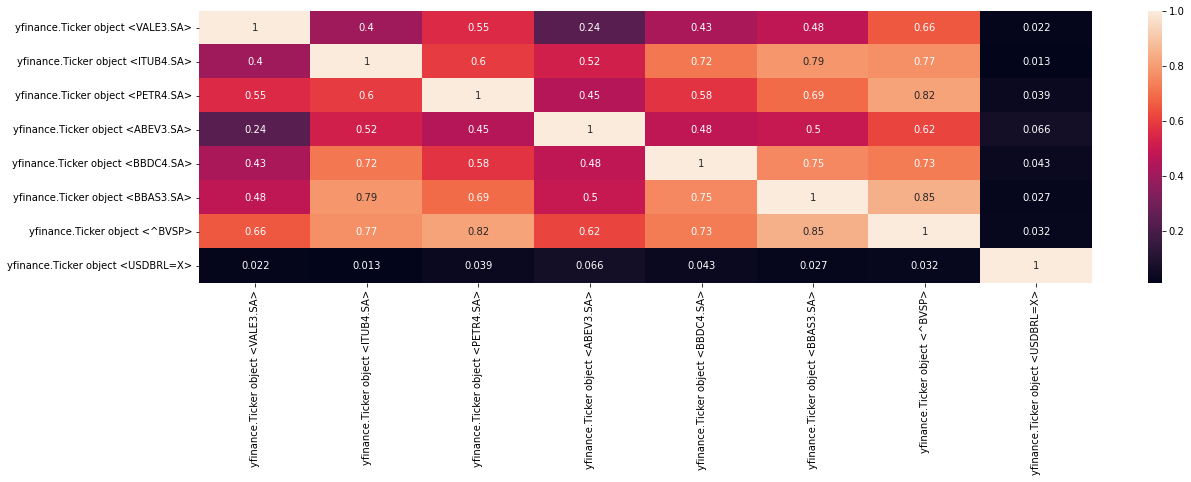

In [ ]:
ax , fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(correlacao.corr(), annot=True)

## Visualização de dados usando Plotly

In [ ]:
import plotly.graph_objs as go

In [ ]:
def plot_lines(df_, columns=['Open', 'Close', 'High','Low']):
  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x = list(df_.index),
                             y = df_ [c],
                             mode = 'markers+lines',
                             name = c))
    return fig

In [ ]:
plot_lines(df)
print(plot_lines)


<function plot_lines at 0x7fee9f94f290>


In [ ]:
def plotCandleStick(df, acao= 'ticket'):
  tracel = {
      'x' : df.index,
      'open' : df.Open,
      'high' : df.High,
      'low' : df.Low,
      'type':'candlestick',
      'name' : acao ,
      'showlegend' : False
  }
  
  data = [tracel] 
  layout= go.Layout()

  fig =go.Figure(data=data, layout=layout)
  return fig 


In [ ]:
#travei aqui, o grafico CandleStick nao me retorna valor.

NameError: ignored

In [ ]:
plotCandleStick(df)

TypeError: ignored